# Fundamentals of Nearest Neighbor
These are non-generalizing learning models .i.e simply stores all the training data.
Stores data into fast access data structure like Ball Tree & KD Tree
The principle behind nearest neighbor methods is to find a predefined number of training samples closest in distance to the new point, and predict the label/value from these.
The number of samples can be a user-defined constant or configured radius
Very useful when decision boundry is very irregular.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.neighbors import NearestNeighbors

In [3]:
nn = NearestNeighbors(n_neighbors=2, algorithm='ball_tree')#only 2 nieghbor

In [4]:
from sklearn.datasets import make_blobs

In [5]:
X,_ = make_blobs(n_features=2, n_samples=10, cluster_std=5)

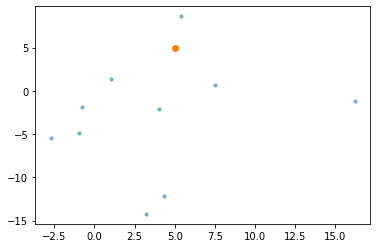

In [6]:
plt.scatter(X[:,0], X[:,1], s=10,alpha=.5)
plt.scatter([5],[5])

In [7]:
nn.fit(X)


NearestNeighbors(algorithm='ball_tree', n_neighbors=2)

In [8]:
nn.kneighbors([[5,5]])

(array([[3.64877129, 5.0209417 ]]), array([[7, 2]], dtype=int64))

In [9]:
_,X_nearest = nn.kneighbors([[5,5]])

In [10]:
nearest = X[X_nearest[0]]

In [11]:
X_nearest

array([[7, 2]], dtype=int64)

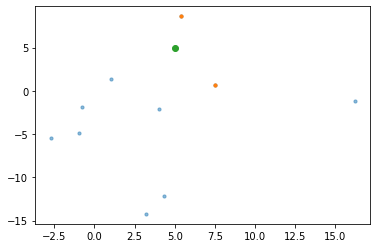

In [12]:
plt.scatter(X[:,0], X[:,1], s=10,alpha=.5)
plt.scatter(nearest[:,0], nearest[:,1], s=10 ,cmap='virdis')
plt.scatter([5],[5])

# Nearest Neighbors for Classification
A query point is assigned the data class which has the most representatives within the nearest neighbors of the point.
Two types of nearest neighbor classifier
KNeighboursClassifier ( based on configured k )
RadiusNeighbourClassifier ( based on configured r )
Weights can be ‘uniform’ or ‘distance’. It assigns weights proportional to the inverse of the distance from the query point.

In [13]:
from sklearn.neighbors import KNeighborsClassifier,RadiusNeighborsClassifier

In [14]:
knc = KNeighborsClassifier(n_neighbors=5)
rnc = RadiusNeighborsClassifier(radius=5)

In [15]:
X,Y = make_blobs(n_features=2, n_samples=50, cluster_std=5, centers=2)

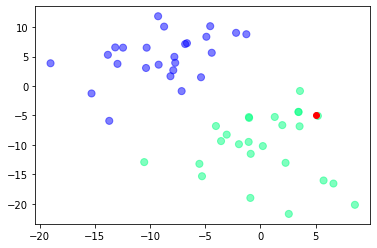

In [16]:
plt.scatter(X[:,0], X[:,1], s=50,alpha=.5, c=Y, cmap='winter')
plt.scatter([5],[-5],c='r')

In [17]:
knc.fit(X,Y)
rnc.fit(X,Y)

RadiusNeighborsClassifier(radius=5)

In [18]:
knc_pred = knc.predict([[5,-5]])

In [19]:
knc_pred

array([1])

In [20]:
knc.kneighbors([[5,-5]])

(array([[0.22110307, 1.64471076, 1.67734081, 2.34460486, 3.43315994]]),
 array([[34,  4, 13, 11,  2]], dtype=int64))

In [21]:
_, knc_neighbors = knc.kneighbors([[5,-5]])

In [22]:
knc_neighbors

array([[34,  4, 13, 11,  2]], dtype=int64)

In [23]:
rnc_pred = rnc.predict([[5,-5]])

In [24]:
rnc_pred

array([1])

In [25]:
rnc.radius_neighbors([[5,-5]])

(array([array([3.43315994, 1.64471076, 2.34460486, 1.67734081, 4.3904105 ,
               3.7097247 , 0.22110307])                                   ],
       dtype=object),
 array([array([ 2,  4, 11, 13, 19, 27, 34], dtype=int64)], dtype=object))

In [26]:
_,rnc_neighbors = rnc.radius_neighbors([[5,-5]])

In [27]:
rnc_neighbors[0]

array([ 2,  4, 11, 13, 19, 27, 34], dtype=int64)

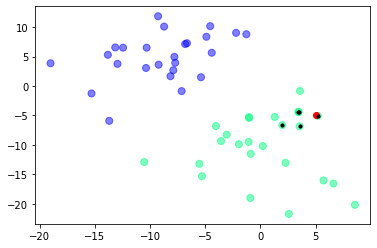

In [28]:
nearest = X[knc_neighbors[0]]
plt.scatter(X[:,0], X[:,1], s=50,alpha=.5, c=Y, cmap='winter')
plt.scatter([5],[-5],c='r')
plt.scatter(nearest[:,0], nearest[:,1], s=10, c='k')

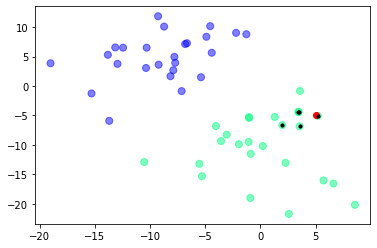

In [29]:
earest = X[rnc_neighbors[0]]
plt.scatter(X[:,0], X[:,1], s=50,alpha=.5, c=Y, cmap='winter')
plt.scatter([5],[-5],c='r')
plt.scatter(nearest[:,0], nearest[:,1], s=10, c='k')

# Nearest Neighbors for Regression
The labels of data are continues
The label assigned to a query point is computed based the mean/medium of the labels of its nearest neighbors.
Neighbors to be considered can be based on count or radius distance
KNeighbourRegressor
RadiusNeighbourRegressor
'weight' parameter to control impact of neighbor based on closeness
NearestNeighborRegressor is capable of predicting mutiple outputs

In [35]:
from sklearn.datasets import fetch_olivetti_faces

In [36]:
faces = fetch_olivetti_faces()

In [37]:
targets = faces.target

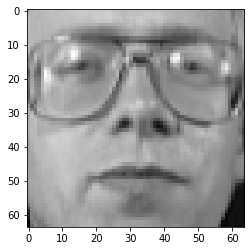

In [38]:
plt.imshow(faces.images[11], cmap='gray')

In [39]:
faces.images.shape

(400, 64, 64)

In [40]:
faces.data.shape

(400, 4096)

In [41]:
train = faces.data[targets < 30]
test = faces.data[targets >= 30]

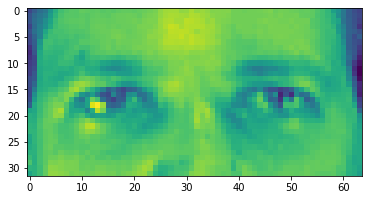

In [42]:
plt.imshow(train[0][:2048].reshape(32,64))
#divide the images into 2 part

In [43]:
trainX = train[:,:2048]
trainY = train[:,2048:]
testX = test[:,:2048]
testY = test[:,2048:]

In [44]:
from sklearn.neighbors import KNeighborsRegressor

In [45]:
nn_r = KNeighborsRegressor(n_neighbors=20,weights='distance', n_jobs=-1)

In [46]:
nn_r.fit(trainX,trainY)

KNeighborsRegressor(n_jobs=-1, n_neighbors=20, weights='distance')

In [47]:
sample = testX[::10]

In [48]:
res = nn_r.predict(sample)

# Nearest Centroid Classifier
Used for classification
Computes the centroid for each class.
Measures the distance ( generally Euclidean ) of the data point X to the centroid of each class.
If the distance is of X and the centroid of a particular class is minimum then it assigns that class to the data point X ( The argmin statement in the picture you have provided ) i.e Y predicts the centroid closest to the point X
It's different from KMeans, since KMeans identifies the clusters & here we assign data to cluster